In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import statsmodels.api as sm
import math

In [2]:
# import data
data = pd.read_csv ("data/hcmv.txt", sep= '\s{1,}', engine='python')
data

,location
0,177
1,1321
2,1433
3,1477
4,3248
...,...
291,227238
292,227249
293,227316
294,228424


In [3]:
n = 296 # number of palindromes
N = 229354 # number of base pairs

## Small Question 1

Generate uniformly distributed random sample from uniform distribution

In [4]:
simulated_sample_1 = np.sort(np.random.randint(1, N + 1,n))
simulated_sample_2 = np.sort(np.random.randint(1, N + 1,n))
simulated_sample_3 = np.sort(np.random.randint(1, N + 1,n))

Look at the location distribution

Text(0.5, 1.0, 'Histogram of Palindromes in Consecutive Intervals of 4000 - Observed Data')

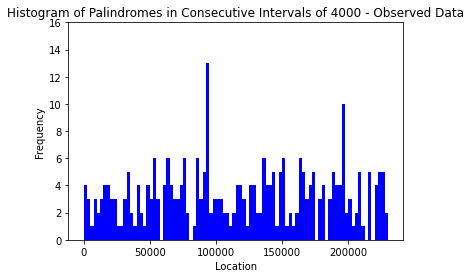

In [5]:
leng = 2500
observed_hist = plt.hist(data.get("location"),  bins = np.arange(0, N + leng, leng), color = "blue")
plt.ylim((0, 16))
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.title("Histogram of Palindromes in Consecutive Intervals of 4000 - Observed Data")

Text(0.5, 1.0, 'Histogram of Palindromes in Consecutive Intervals of 2500 - Simulated Data 1')

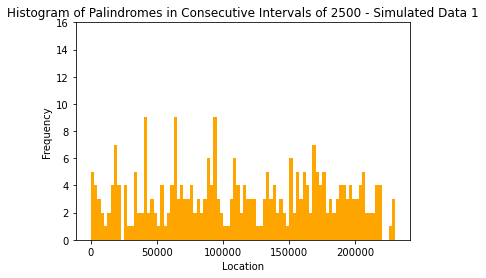

In [6]:
simulated_hist = plt.hist(simulated_sample_1,  bins = np.arange(0, N + leng, leng), color = "orange")
plt.ylim((0, 16))
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.title("Histogram of Palindromes in Consecutive Intervals of 2500 - Simulated Data 1")

Text(0.5, 1.0, 'Histogram of Palindromes in Consecutive Intervals of 2500 - Simulated Data 2')

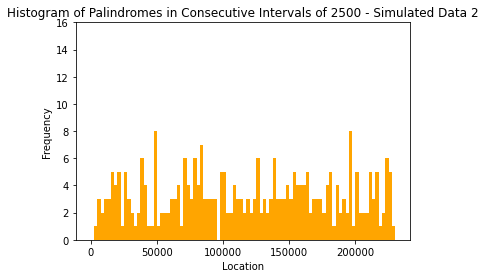

In [7]:
simulated_hist = plt.hist(simulated_sample_2,  bins = np.arange(0, N + leng, leng), color = "orange")
plt.ylim((0, 16))
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.title("Histogram of Palindromes in Consecutive Intervals of 2500 - Simulated Data 2")

Text(0.5, 1.0, 'Histogram of Palindromes in Consecutive Intervals of 2500 - Simulated Data 3')

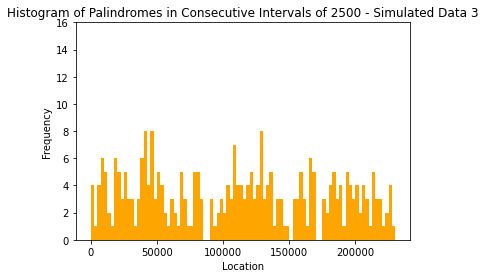

In [8]:
simulated_hist = plt.hist(simulated_sample_3,  bins = np.arange(0, N + leng, leng), color = "orange")
plt.ylim((0, 16))
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.title("Histogram of Palindromes in Consecutive Intervals of 2500 - Simulated Data 3")

Look at the spacing between palindromes

In [9]:
def calculateSpacings(data_array):
    spacings = np.array([data_array[0]])
    
    for i in np.arange(1, n):
        diff = data_array[i] - data_array[i - 1]
        spacings = np.append(spacings, diff)
        
    return spacings

In [10]:
oberved_spacings = calculateSpacings(data.get("location").to_numpy())
simulated_spacings_1 = calculateSpacings(simulated_sample_1)
simulated_spacings_2 = calculateSpacings(simulated_sample_2)
simulated_spacings_3 = calculateSpacings(simulated_sample_3)

Text(0.5, 1.0, 'Scatter plot of Spacing between Consecutive Palindromes - Observed Data')

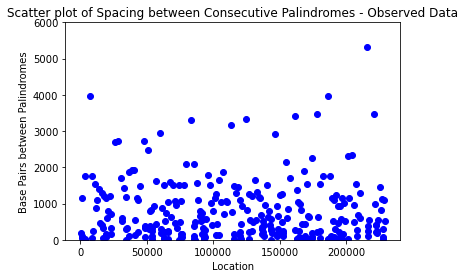

In [11]:
plt.scatter(x = data.get("location").to_numpy(), y = oberved_spacings, color = "blue")
plt.ylim((0, 6000))
plt.xlabel("Location")
plt.ylabel("Base Pairs between Palindromes")
plt.title("Scatter plot of Spacing between Consecutive Palindromes - Observed Data")

Text(0.5, 1.0, 'Scatter plot of Spacing between Consecutive Palindromes - Simulated Data 1')

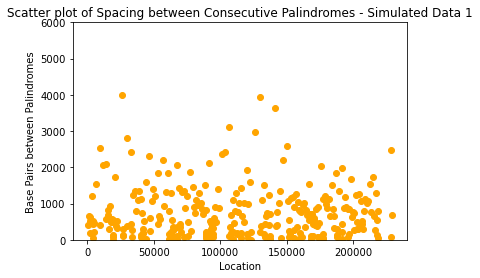

In [12]:
plt.scatter(x = simulated_sample_1, y = simulated_spacings_1, color = "orange")
plt.ylim((0, 6000))
plt.xlabel("Location")
plt.ylabel("Base Pairs between Palindromes")
plt.title("Scatter plot of Spacing between Consecutive Palindromes - Simulated Data 1")

Text(0.5, 1.0, 'Scatter plot of Spacing between Consecutive Palindromes - Simulated Data 2')

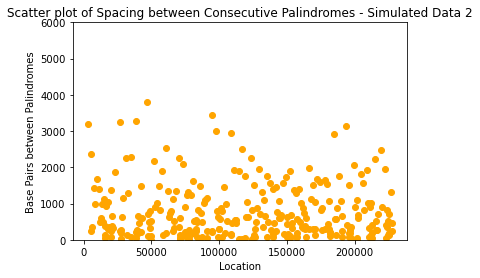

In [13]:
plt.scatter(x = simulated_sample_2, y = simulated_spacings_2, color = "orange")
plt.ylim((0, 6000))
plt.xlabel("Location")
plt.ylabel("Base Pairs between Palindromes")
plt.title("Scatter plot of Spacing between Consecutive Palindromes - Simulated Data 2")

Text(0.5, 1.0, 'Scatter plot of Spacing between Consecutive Palindromes - Simulated Data 3')

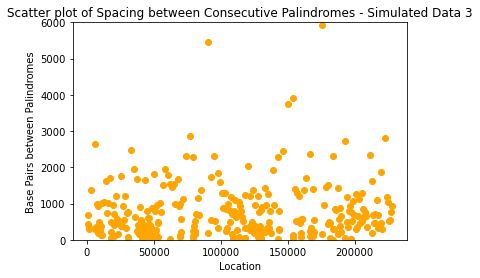

In [14]:
plt.scatter(x = simulated_sample_3, y = simulated_spacings_3, color = "orange")
plt.ylim((0, 6000))
plt.xlabel("Location")
plt.ylabel("Base Pairs between Palindromes")
plt.title("Scatter plot of Spacing between Consecutive Palindromes - Simulated Data 3")

Look at the counts in non-overlapping regions

In [15]:
interval_len = 2500
#bins
b = np.arange(0, N + interval_len, interval_len)
len(b)

93

In [16]:
#count frequency of palindromes
observed_hist, bins = np.histogram(data.get("location"), bins=b)
simulated_hist_1, bins = np.histogram(simulated_sample_1, bins=b)
simulated_hist_2, bins = np.histogram(simulated_sample_2, bins=b)
simulated_hist_3, bins = np.histogram(simulated_sample_3, bins=b)
observed_hist

array([ 4,  3,  1,  3,  2,  3,  4,  4,  3,  3,  1,  1,  3,  5,  2,  1,  4,
        2,  1,  4,  3,  6,  3,  0,  4,  6,  4,  3,  3,  4,  6,  2,  0,  1,
        6,  3,  5, 13,  2,  3,  3,  3,  2,  2,  1,  2,  4,  4,  3,  1,  4,
        4,  2,  2,  6,  4,  4,  5,  1,  5,  6,  1,  2,  1,  2,  6,  5,  3,
        4,  5,  0,  3,  4,  0,  3,  5,  4,  4, 10,  2,  3,  1,  2,  5,  1,
        0,  5,  0,  4,  5,  5,  2])

Text(0.5, 1.0, 'Counts of Palindromes in Non-Overlapping Region of 2500 - Observed Data')

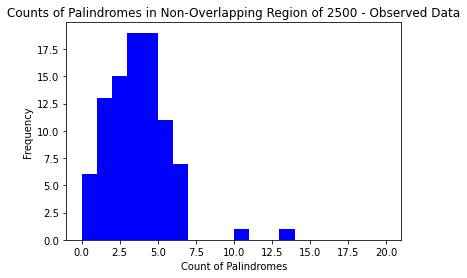

In [17]:
plt.hist(x = observed_hist, color = "blue", bins = np.arange(0, 21))
plt.xlabel("Count of Palindromes")
plt.ylabel("Frequency")
plt.title("Counts of Palindromes in Non-Overlapping Region of 2500 - Observed Data")

Text(0.5, 1.0, 'Counts of Palindromes in Non-Overlapping Region of 2500 - Simulated Data 1')

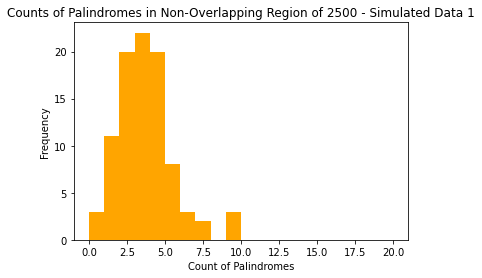

In [18]:
plt.hist(x = simulated_hist_1, color = "orange", bins = np.arange(0, 21))
plt.xlabel("Count of Palindromes")
plt.ylabel("Frequency")
plt.title("Counts of Palindromes in Non-Overlapping Region of 2500 - Simulated Data 1")

Text(0.5, 1.0, 'Counts of Palindromes in Non-Overlapping Region of 2500 - Simulated Data 2')

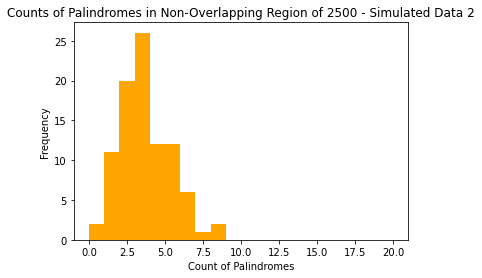

In [19]:
plt.hist(x = simulated_hist_2, color = "orange", bins = np.arange(0, 21))
plt.xlabel("Count of Palindromes")
plt.ylabel("Frequency")
plt.title("Counts of Palindromes in Non-Overlapping Region of 2500 - Simulated Data 2")

Text(0.5, 1.0, 'Counts of Palindromes in Non-Overlapping Region of 2500 - Simulated Data 3')

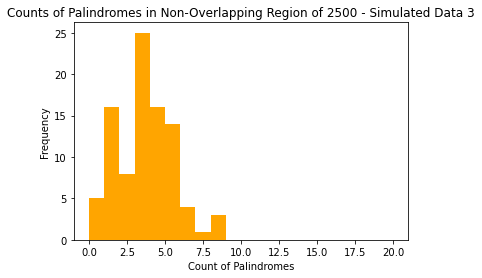

In [20]:
plt.hist(x = simulated_hist_3, color = "orange", bins = np.arange(0, 21))
plt.xlabel("Count of Palindromes")
plt.ylabel("Frequency")
plt.title("Counts of Palindromes in Non-Overlapping Region of 2500 - Simulated Data 3")

In [21]:
for i in np.arange(0, len(observed_hist)):
    if observed_hist[i] >= 10 :
        print("In the interval [", b[i], ",", b[i+1], ") and the counts is:", observed_hist[i])

In the interval [ 92500 , 95000 ) and the counts is: 13
In the interval [ 195000 , 197500 ) and the counts is: 10


## Small Question 2

In [22]:
nums_intervals = np.array([59, 60, 61])
intervals_lens = np.array([])

for r in nums_intervals:
    intervals_lens = np.append(intervals_lens, math.ceil(N / r))
    
intervals_lens

array([3888., 3823., 3760.])

### For locations

#### Graphical Method

In [23]:
def locationsHist(observed_data, simulated_data, b, num_intervals):
    plt.hist(observed_data,  bins = b, color = "blue", alpha = 0.6)
    plt.hist(simulated_data,  bins = b, color = "orange", alpha = 0.6)
    
    plt.ylim((0, 30))
    plt.xlabel("Location")
    plt.ylabel("Frequency")
    
    title = "Histogram of Locations of Palindromes in " + str(num_intervals) + " Intervals "
    plt.title(title)
    plt.legend(["Observed", "Simulated"])

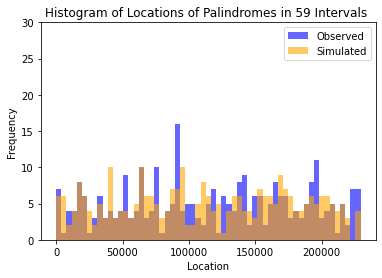

In [24]:
# 15 intervals
locationsHist(data.get("location"), simulated_sample_1, np.arange(0, N + intervals_lens[0], intervals_lens[0]), nums_intervals[0])

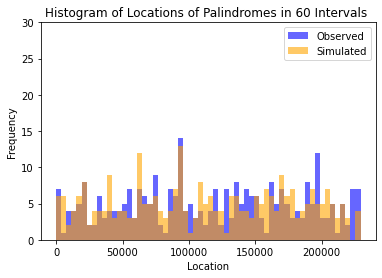

In [25]:
# 20 intervals
locationsHist(data.get("location"), simulated_sample_1, np.arange(0, N + intervals_lens[1], intervals_lens[1]), nums_intervals[1])

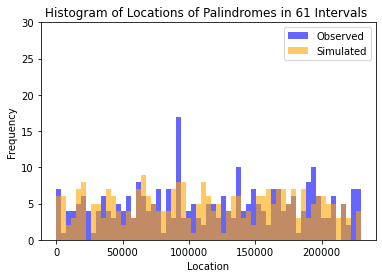

In [26]:
# 25 intervals
locationsHist(data.get("location"), simulated_sample_1, np.arange(0, N + intervals_lens[2], intervals_lens[2]), nums_intervals[2])

#### Chi-square Goodness of fit

In [27]:
from scipy.stats import chisquare

#expected_palindromes_in_intervals = n / # of intervals
expected_palindromes_in_intervals = np.zeros(len(nums_intervals))
for i in np.arange(0, 3):
    expected_palindromes_in_intervals[i] = n / nums_intervals[i]
    
expected_palindromes_in_intervals

array([5.01694915, 4.93333333, 4.85245902])

In [28]:
def generate_exp_locations(num_intervals, exp_palindromes):
    exp = np.zeros(num_intervals)
    
    for i in np.arange(0, len(exp)):
        exp[i] = exp_palindromes
    
    return exp

In [29]:
# for 15 intervals
exp = generate_exp_locations(nums_intervals[0], expected_palindromes_in_intervals[0])
observed_hist, bins = np.histogram(data.get("location"), bins= np.arange(0, N + intervals_lens[0], intervals_lens[0]))

chisquare(observed_hist, f_exp=exp)

Power_divergenceResult(statistic=91.88513513513514, pvalue=0.0030479467913747038)

In [30]:
# for 20 intervals
exp = generate_exp_locations(nums_intervals[1], expected_palindromes_in_intervals[1])
observed_hist, bins = np.histogram(data.get("location"), bins= np.arange(0, N + intervals_lens[1], intervals_lens[1]))

chisquare(observed_hist, f_exp=exp)

Power_divergenceResult(statistic=79.0, pvalue=0.04214038713025198)

In [31]:
# for 25 intervals
exp = generate_exp_locations(nums_intervals[2], expected_palindromes_in_intervals[2])
observed_hist, bins = np.histogram(data.get("location"), bins= np.arange(0, N + intervals_lens[2], intervals_lens[2]))

chisquare(observed_hist, f_exp=exp)

Power_divergenceResult(statistic=85.66216216216218, pvalue=0.016495730754448462)

### For Spacings  between Consecutive Palindromes

In [32]:
def calculateSpacings(data_array):
    spacings = np.array([])
    
    for i in np.arange(1, n):
        diff = data_array[i] - data_array[i - 1]
        spacings = np.append(spacings, diff)
        
    return spacings

In [33]:
oberved_spacings = calculateSpacings(data.get("location").to_numpy())
exponential_lambda = 1 / oberved_spacings.mean()
exponential_lambda, len(oberved_spacings)

(0.0012894709235234465, 295)

#### Graphical Method

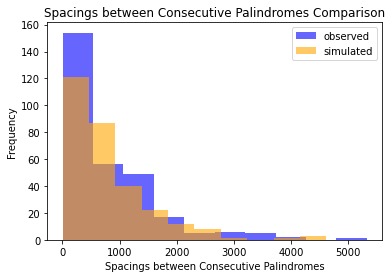

In [34]:
from numpy import random

simulated_expo = random.exponential(1/exponential_lambda, n-1)
plt.hist(oberved_spacings, color = "blue", alpha = 0.6)
plt.hist(simulated_expo, color = "orange", alpha = 0.6)
plt.xlabel("Spacings between Consecutive Palindromes")
plt.ylabel("Frequency")
plt.title("Spacings between Consecutive Palindromes Comparison")
plt.legend(["observed", "simulated"])

#### Chi-square Goodness of fit

In [35]:
# 7 intervals to make sure the number of each bin has at least 1
len_interval = oberved_spacings.max() / 7
b = np.arange(0, oberved_spacings.max() + len_interval, len_interval)

obs, bins = np.histogram(oberved_spacings, bins=b)
obs

array([179,  74,  25,   8,   6,   2,   1])

In [36]:
ps = np.zeros(7) # pj

for i in np.arange(0, 7):
    ps[i] = math.exp(-exponential_lambda * ((i + 1) * len_interval))
    
exp_expo = np.zeros(7) #npj
for i in np.arange(0, 7):
    exp_expo[i] = (n-1) * ps[i]
    
chisquare(obs, f_exp = exp_expo)

Power_divergenceResult(statistic=85.07750306615905, pvalue=3.1813095780084757e-16)

### Pair and Triplet

#### Graphical Method

In [37]:
def calculatePairSpacings(data_array):
    spacings = np.array([])
    
    for i in np.arange(2, n, 1):
        diff = data_array[i] - data_array[i - 2]
        spacings = np.append(spacings, diff)
        
    return spacings

def calculateTripletSpacings(data_array):
    spacings = np.array([])
    
    for i in np.arange(3, n, 1):
        diff = data_array[i] - data_array[i - 3]
        spacings = np.append(spacings, diff)
        
    return spacings

In [38]:
obs_pair_spacings = calculatePairSpacings(data.get("location").to_numpy())
obs_triplet_spacings = calculateTripletSpacings(data.get("location").to_numpy())
pair_lambda = 1 / obs_pair_spacings.mean()
triplet_lambda = 1 / obs_triplet_spacings.mean()
pair_lambda, triplet_lambda

(0.0006449079690005462, 0.00042976874627802665)

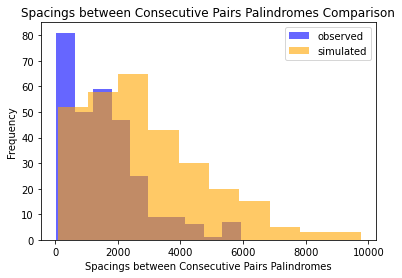

In [39]:
pair_simulated_data = random.gamma(2, scale = 1 / pair_lambda, size= len(obs_pair_spacings))
plt.hist(obs_pair_spacings, color = "blue", alpha = 0.6)
plt.hist(pair_simulated_data, color = "orange", alpha = 0.6)
plt.xlabel("Spacings between Consecutive Pairs Palindromes")
plt.ylabel("Frequency")
plt.title("Spacings between Consecutive Pairs Palindromes Comparison")
plt.legend(["observed", "simulated"])

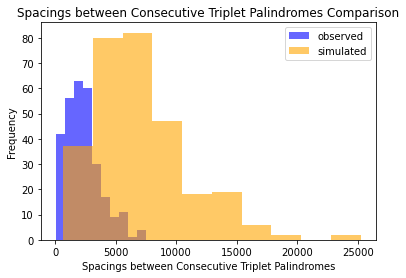

In [40]:
triplet_simulated_data = random.gamma(3, scale = 1 / triplet_lambda, size= len(obs_triplet_spacings))
plt.hist(obs_triplet_spacings, color = "blue", alpha = 0.6)
plt.hist(triplet_simulated_data, color = "orange", alpha = 0.6)
plt.xlabel("Spacings between Consecutive Triplet Palindromes")
plt.ylabel("Frequency")
plt.title("Spacings between Consecutive Triplet Palindromes Comparison")
plt.legend(["observed", "simulated"])

#### Chi-square Goodness of fit

For pairs

In [41]:
from scipy.stats import gamma

# 16 intervals to make sure the number of each bin has at least 1 
len_interval = obs_pair_spacings.max() / 16
b = np.arange(0, obs_pair_spacings.max() + len_interval, len_interval)

obs, bins = np.histogram(obs_pair_spacings, bins=b)
obs

array([51, 44, 24, 42, 38, 27, 27,  9,  6,  6,  6,  5,  1,  1,  3,  4])

In [52]:
# for pairs
ps = np.zeros(16) # pj

for i in np.arange(0, 16):
    ps[i] = gamma.cdf((i+1) * len_interval, 2, loc=0, scale= (1/pair_lambda))
    
exp_pair = np.zeros(16) #npj
for i in np.arange(0, 16):
    exp_pair[i] = (n - 2) * ps[i]
    
chisquare(obs, f_exp = exp_pair)

Power_divergenceResult(statistic=2448.1319150982786, pvalue=0.0)

For triplets

In [59]:
# 19 intervals to make sure the number of each bin has at least 1 except the last one
len_interval = obs_triplet_spacings.max() / 19
b = np.arange(0, obs_triplet_spacings.max() + len_interval, len_interval)

obs, bins = np.histogram(obs_triplet_spacings, bins=b)
obs

array([16, 23, 24, 36, 37, 27, 33, 33, 13, 14,  9,  4,  7,  4,  7,  1,  1,
        1,  3])

In [60]:
# for triplets
ps = np.zeros(19) # pj

for i in np.arange(0, 19):
    ps[i] = gamma.cdf((i+1) * len_interval, 2, loc=0, scale= (1/pair_lambda))
    
exp_pair = np.zeros(19) #npj
for i in np.arange(0, 19):
    exp_pair[i] = (n - 3) * ps[i]
    
chisquare(obs, f_exp = exp_pair)

Power_divergenceResult(statistic=2991.365600862143, pvalue=0.0)